In [ ]:
#import necessary packages
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:
#define data
train_path = "/content/drive/MyDrive/AI/dataset/pneumonia/chest_xray/train"
test_path = "/content/drive/MyDrive/AI/dataset/pneumonia/chest_xray/test"

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
  # useful for getting number of classes (label)
folders = glob("/content/drive/MyDrive/AI/dataset/pneumonia/chest_xray/train/*")

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Data augmentation and scaling
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/AI/dataset/pneumonia/chest_xray/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/AI/dataset/pneumonia/chest_xray/test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')




Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

In [ ]:
# fit the model


r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/5
163/163 [==============================] - 1129s 7s/step - loss: 0.2139 - accuracy: 0.9210 - val_loss: 0.3068 - val_accuracy: 0.8990
Epoch 2/5
163/163 [==============================] - 148s 910ms/step - loss: 0.1051 - accuracy: 0.9607 - val_loss: 0.2209 - val_accuracy: 0.9199
Epoch 3/5
163/163 [==============================] - 148s 906ms/step - loss: 0.0981 - accuracy: 0.9657 - val_loss: 0.2988 - val_accuracy: 0.9231
Epoch 4/5
163/163 [==============================] - 150s 919ms/step - loss: 0.0875 - accuracy: 0.9657 - val_loss: 0.3051 - val_accuracy: 0.9151
Epoch 5/5
163/163 [==============================] - 148s 908ms/step - loss: 0.0816 - accuracy: 0.9716 - val_loss: 0.2552 - val_accuracy: 0.9167


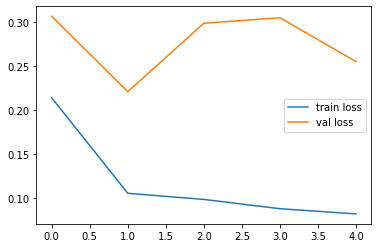

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Trainloss and validation loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

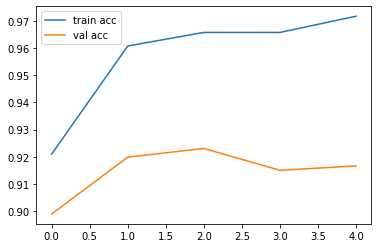

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('pneumonia_new_model.h5')